** The project aims to analyze 12 months worth of sales data. The data contains electronics store purchases broken down by month, product type, cost. **

### 1. Libraries and data import

In [1]:
%%bash 
newdir="Sales_Data"
if [ ! -d $newdir ]; then
  mkdir $newdir
fi


In [2]:
%pwd
%cd ./Sales_Data/
%pwd

/content/Sales_Data


'/content/Sales_Data'

In [3]:
from google.colab import files  
uploaded = files.upload()

import io 
import pandas as pd
import os


Saving Sales_April_2019.csv to Sales_April_2019.csv
Saving Sales_August_2019.csv to Sales_August_2019.csv
Saving Sales_December_2019.csv to Sales_December_2019.csv
Saving Sales_February_2019.csv to Sales_February_2019.csv
Saving Sales_January_2019.csv to Sales_January_2019.csv
Saving Sales_July_2019.csv to Sales_July_2019.csv
Saving Sales_June_2019.csv to Sales_June_2019.csv
Saving Sales_March_2019.csv to Sales_March_2019.csv
Saving Sales_May_2019.csv to Sales_May_2019.csv
Saving Sales_November_2019.csv to Sales_November_2019.csv
Saving Sales_October_2019.csv to Sales_October_2019.csv
Saving Sales_September_2019.csv to Sales_September_2019.csv


In [4]:
files = [file for file in os.listdir('.')]
print(files)

['Sales_February_2019.csv', 'Sales_December_2019.csv', 'Sales_August_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv', 'Sales_April_2019.csv', 'Sales_November_2019.csv', 'Sales_May_2019.csv', 'Sales_March_2019.csv', 'Sales_July_2019.csv', 'Sales_January_2019.csv', 'Sales_June_2019.csv']


### 2. Data merging

In [5]:
all_Files = pd.DataFrame()
for filename in files:
    df = pd.read_csv("./"+filename)
    all_Files = pd.concat([all_Files, df])
  
all_Files.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


### 3. Finding the best month for sales



3.1 Adding the column with month number

In [6]:
all_Files['month'] = all_Files['Order Date'].astype(str).str[0:2]
all_Files.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",02
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",02
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",02
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",02
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",02


3.2 Cleaning the data - removing rows of NaN and 'Or'

In [10]:
all_Files = all_Files.dropna()

In [11]:
all_Files = all_Files[all_Files != 'Or']

3.3 Converting month column to int32


In [12]:
all_Files['month'] = all_Files['month'].astype('int32')

To find the best month for sales we can multiply the Quantity Ordered by Price Each

In [13]:
all_Files['Price Each'] = all_Files['Price Each'].astype('float')
all_Files['Quantity Ordered'] = all_Files['Quantity Ordered'].astype('int32')
all_Files['sales'] = all_Files['Quantity Ordered'] * all_Files['Price Each']

all_Files.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,150502,iPhone,1,700.00,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2,700.00
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",2,3.84
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",2,389.99
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",2,14.95
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",2,7.68


In [14]:
import calendar

sum_month = all_Files.groupby('month').sum()
print(sum_month)

best_month = sum_month['sales'].idxmax(axis = 1)
print("The best month for sales is", calendar.month_name[best_month])

       Quantity Ordered    Price Each         sales
month                                              
1                 10903  1.811768e+06  1.822257e+06
2                 13449  2.188885e+06  2.202022e+06
3                 17005  2.791208e+06  2.807100e+06
4                 20558  3.367671e+06  3.390670e+06
5                 18667  3.135125e+06  3.152607e+06
6                 15253  2.562026e+06  2.577802e+06
7                 16072  2.632540e+06  2.647776e+06
8                 13448  2.230345e+06  2.244468e+06
9                 13109  2.084992e+06  2.097560e+06
10                22703  3.715555e+06  3.736727e+06
11                19798  3.180601e+06  3.199603e+06
12                28114  4.588415e+06  4.613443e+06
The best month for sales is December


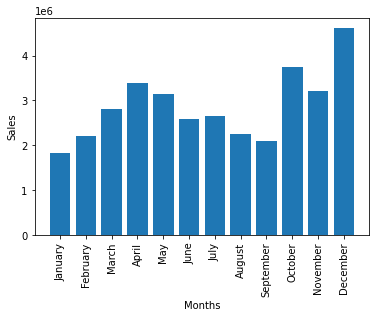

In [15]:
import matplotlib.pyplot as plt

months = calendar.month_name[1:13]
plt.bar(months, sum_month['sales'])
plt.xlabel('Months')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

### 4. Finding the city which had the highest number of sales

In [16]:
all_Files['city'] = all_Files['Purchase Address'].astype(str).str.rsplit(pat=',').str[-2]
all_Files['state'] = all_Files['Purchase Address'].astype(str).str.rsplit(pat=' ').str[-2]
all_Files['city'] = all_Files['city'] + ' ' + all_Files['state']
all_Files = all_Files.drop(['state'], 1)

all_Files.head()


sum_city = all_Files.groupby('city').sum()
print(sum_city)

best_city = sum_city['sales'].max()
best_city_name = sum_city['sales'].idxmax(axis = 1)
print("the highest number of sales is in", best_city_name)


                   Quantity Ordered    Price Each   month         sales
city                                                                   
 Atlanta GA                   16602  2.779908e+06  104794  2.795499e+06
 Austin TX                    11153  1.809874e+06   69829  1.819582e+06
 Boston MA                    22528  3.637410e+06  141112  3.661642e+06
 Dallas TX                    16730  2.752628e+06  104620  2.767975e+06
 Los Angeles CA               33289  5.421435e+06  208325  5.452571e+06
 New York City NY             27932  4.635371e+06  175741  4.664317e+06
 Portland ME                   2750  4.471893e+05   17144  4.497583e+05
 Portland OR                  11303  1.860558e+06   70621  1.870732e+06
 San Francisco CA             50239  8.211462e+06  315520  8.262204e+06
 Seattle WA                   16553  2.733296e+06  104941  2.747755e+06
the highest number of sales is in  San Francisco CA


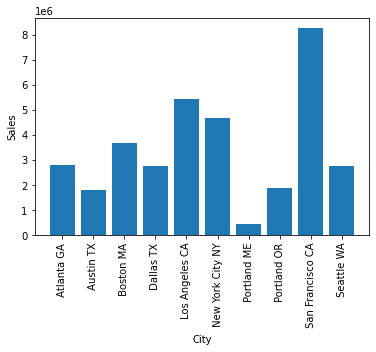

In [17]:
cities = [city for city, df in all_Files.groupby('city')]
plt.bar(cities, sum_city['sales'])
plt.xlabel('City')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

### 5. Finding the best time to display advertisements to maximize the likelihood of customer's buying a product.

In [18]:
all_Files['Order Date'] = pd.to_datetime(all_Files['Order Date'])

all_Files['hour'] = all_Files['Order Date'].dt.hour
all_Files['minute'] = all_Files['Order Date'].dt.minute
all_Files.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour,minute
0,150502,iPhone,1,700.00,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",2,700.00,Portland ME,1,35
1,150503,AA Batteries (4-pack),1,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",2,3.84,San Francisco CA,7,24
2,150504,27in 4K Gaming Monitor,1,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",2,389.99,New York City NY,9,46
3,150505,Lightning Charging Cable,1,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",2,14.95,Atlanta GA,16,47
4,150506,AA Batteries (4-pack),2,3.84,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",2,7.68,Seattle WA,20,32


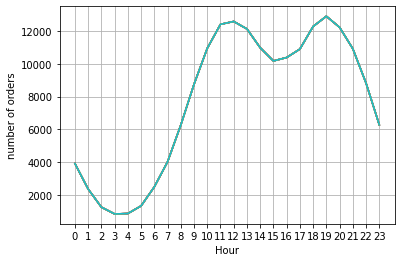

In [19]:
hours = [hour for hour, df in all_Files.groupby('hour')]

plt.plot(hours, all_Files.groupby(['hour']).count())
plt.grid()
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('number of orders')
plt.show()

The best time to put an ad is before 11 or 19.




### 6. Finding products that are most often sold together.

Products sold together have the same Order ID and the same Purchase Address.

6.1 Finding duplicated cells in Order ID column.

In [20]:
df = all_Files[all_Files['Order ID'].duplicated(keep = False)]
df.head(15)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour,minute
16,150518,Macbook Pro Laptop,1,1700.00,2019-02-26 12:38:00,"847 10th St, San Francisco, CA 94016",2,1700.00,San Francisco CA,12,38
17,150518,iPhone,1,700.00,2019-02-26 12:38:00,"847 10th St, San Francisco, CA 94016",2,700.00,San Francisco CA,12,38
82,150582,iPhone,1,700.00,2019-02-16 23:38:00,"678 Maple St, Seattle, WA 98101",2,700.00,Seattle WA,23,38
83,150582,Lightning Charging Cable,1,14.95,2019-02-16 23:38:00,"678 Maple St, Seattle, WA 98101",2,14.95,Seattle WA,23,38
91,150590,Apple Airpods Headphones,1,150.00,2019-02-08 09:35:00,"196 River St, San Francisco, CA 94016",2,150.00,San Francisco CA,9,35
92,150590,AAA Batteries (4-pack),1,2.99,2019-02-08 09:35:00,"196 River St, San Francisco, CA 94016",2,2.99,San Francisco CA,9,35
119,150617,Google Phone,1,600.00,2019-02-25 00:02:00,"551 Sunset St, New York City, NY 10001",2,600.00,New York City NY,0,2
120,150617,USB-C Charging Cable,1,11.95,2019-02-25 00:02:00,"551 Sunset St, New York City, NY 10001",2,11.95,New York City NY,0,2
154,150651,Google Phone,1,600.00,2019-02-02 11:49:00,"525 10th St, New York City, NY 10001",2,600.00,New York City NY,11,49
155,150651,USB-C Charging Cable,1,11.95,2019-02-02 11:49:00,"525 10th St, New York City, NY 10001",2,11.95,New York City NY,11,49


In [21]:
df['grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'grouped']].drop_duplicates()
df.head(15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,grouped
16,150518,"Macbook Pro Laptop,iPhone"
82,150582,"iPhone,Lightning Charging Cable"
91,150590,"Apple Airpods Headphones,AAA Batteries (4-pack)"
119,150617,"Google Phone,USB-C Charging Cable"
154,150651,"Google Phone,USB-C Charging Cable"
180,150674,"Google Phone,USB-C Charging Cable,Wired Headph..."
196,150688,"Google Phone,Wired Headphones"
243,150734,"Google Phone,USB-C Charging Cable"
268,150758,"iPhone,Wired Headphones"
364,150853,"AAA Batteries (4-pack),27in 4K Gaming Monitor"


In [22]:
from itertools import combinations
from collections import Counter

def soldTogether(k):
  count = Counter()
  for row in df['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,k)))
  return(count.most_common(1))


  
print("Two most sold together products are",soldTogether(2)[0][0])
print("Three most sold together products are", soldTogether(3)[0][0])

Two most sold together products are ('iPhone', 'Lightning Charging Cable')
Three most sold together products are ('Google Phone', 'USB-C Charging Cable', 'Wired Headphones')


### 7. Finding the most sold product

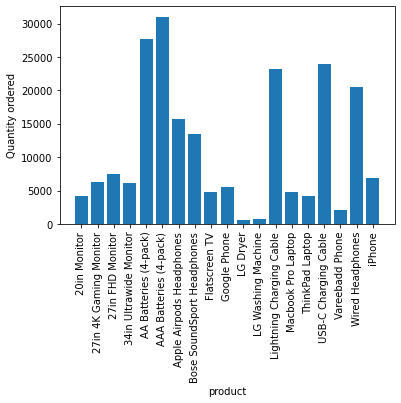

In [23]:
product_group = all_Files.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xlabel('product')
plt.ylabel('Quantity ordered')
plt.xticks(rotation=90)
plt.show()

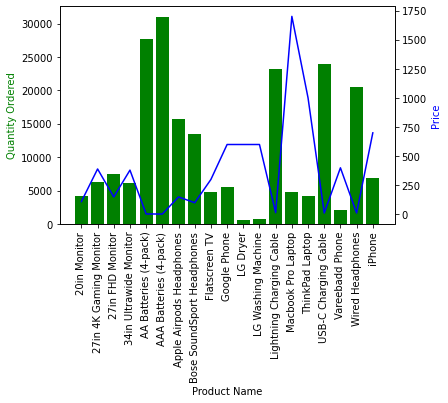

In [24]:
prices = all_Files.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color = 'g')
ax2.set_ylabel('Price', color = 'b')
ax1.set_xticklabels(products, rotation = 'vertical')
plt.show()